In [56]:
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import load_dataset

In [7]:
%matplotlib inline

In [8]:
sns.set()

In [9]:
df = load_dataset()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68206 entries, 2017-01-01 23:30:00 to 2017-12-31 14:55:00
Data columns (total 18 columns):
Vlo-I        68206 non-null object
Ori-I        68206 non-null category
Des-I        68206 non-null category
Emp-I        68206 non-null category
Fecha-O      68206 non-null datetime64[ns]
Vlo-O        68205 non-null object
Ori-O        68206 non-null category
Des-O        68206 non-null category
Emp-O        68206 non-null category
DIA          68206 non-null category
MES          68206 non-null category
AÑO          68206 non-null category
DIANOM       68206 non-null category
TIPOVUELO    68206 non-null category
OPERA        68206 non-null category
SIGLAORI     68206 non-null category
SIGLADES     68206 non-null category
min_diff     68206 non-null float64
dtypes: category(14), datetime64[ns](1), float64(1), object(2)
memory usage: 3.5+ MB


In [18]:
def get_min_diff(df):
    df.reset_index(inplace=True)
    df['min_diff'] = (df['Fecha-O'] - df['Fecha-I']).astype('timedelta64[m]')
    df.set_index('Fecha-I', inplace=True)

In [20]:
get_min_diff(df)

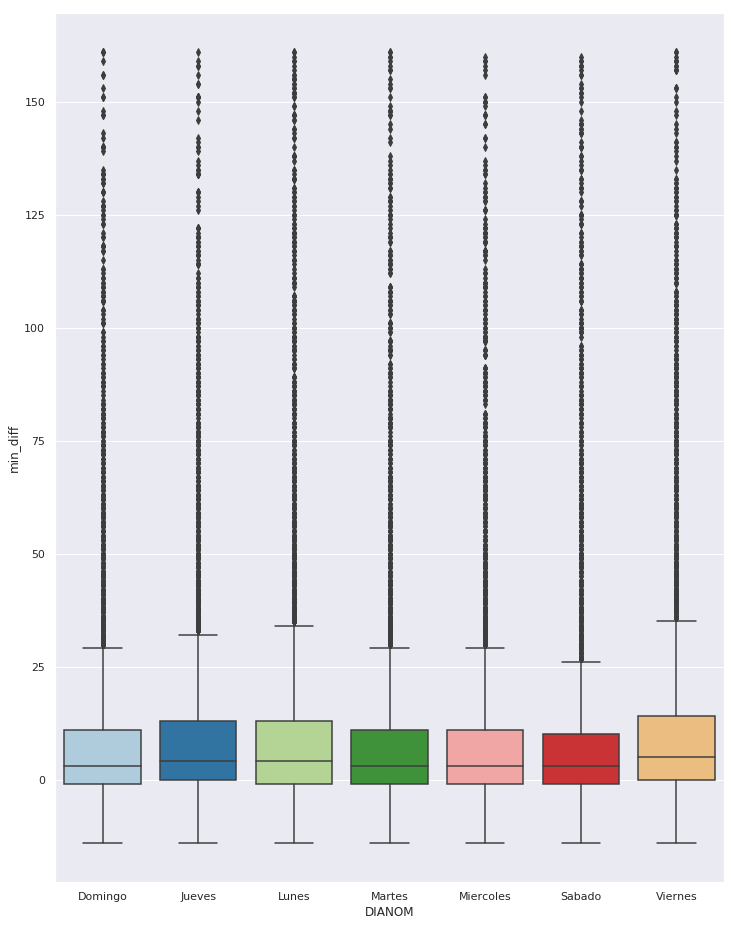

In [28]:
_ = plt.figure(figsize=(12,16))
_ = sns.boxplot(x='DIANOM', y='min_diff', data=df, palette='Paired')


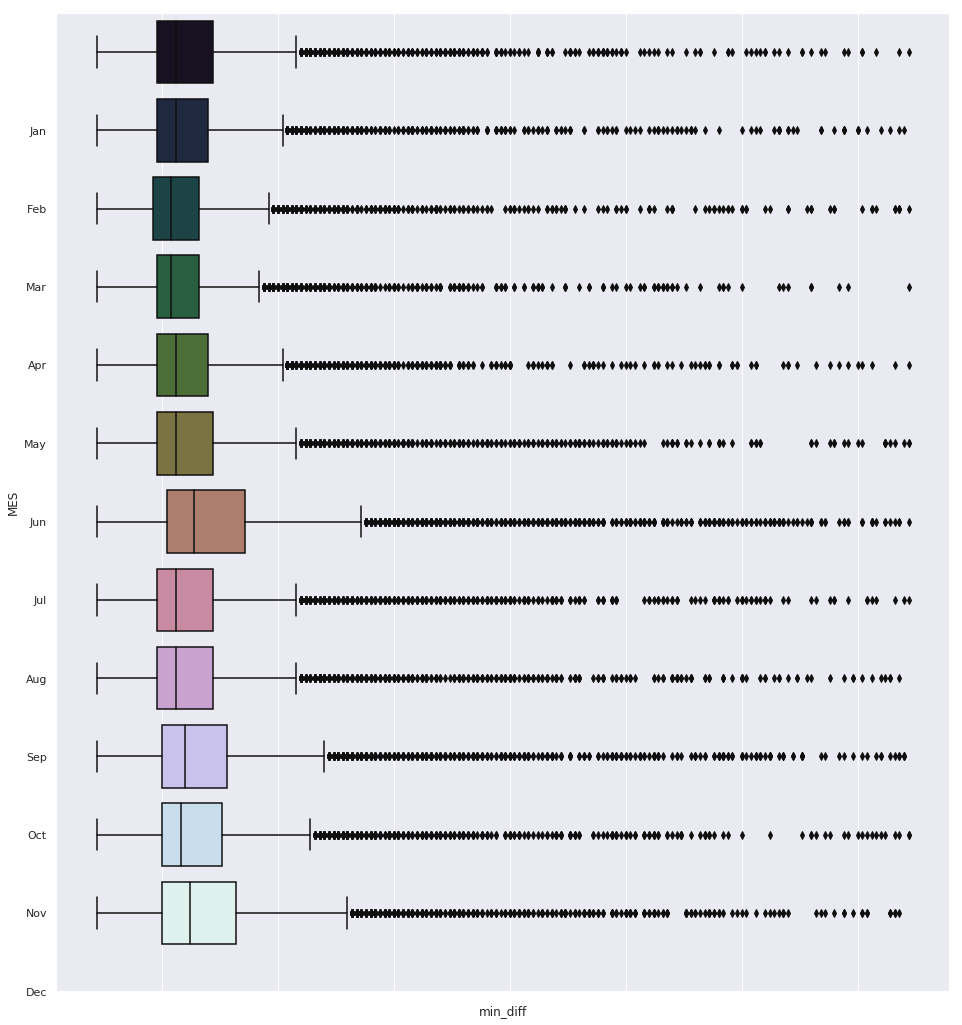

In [60]:
month_dist = df.groupby(df.index.month).count()['MES']
month_names = [calendar.month_abbr[i] for i in month_dist.index]

_ = plt.figure(figsize=(16,18))
_ = sns.boxplot(x='min_diff', y='MES', data=df, palette='cubehelix')
_ = _.set_xticklabels(_.get_xticklabels())
_ = plt.yticks(month_dist.index, month_names)

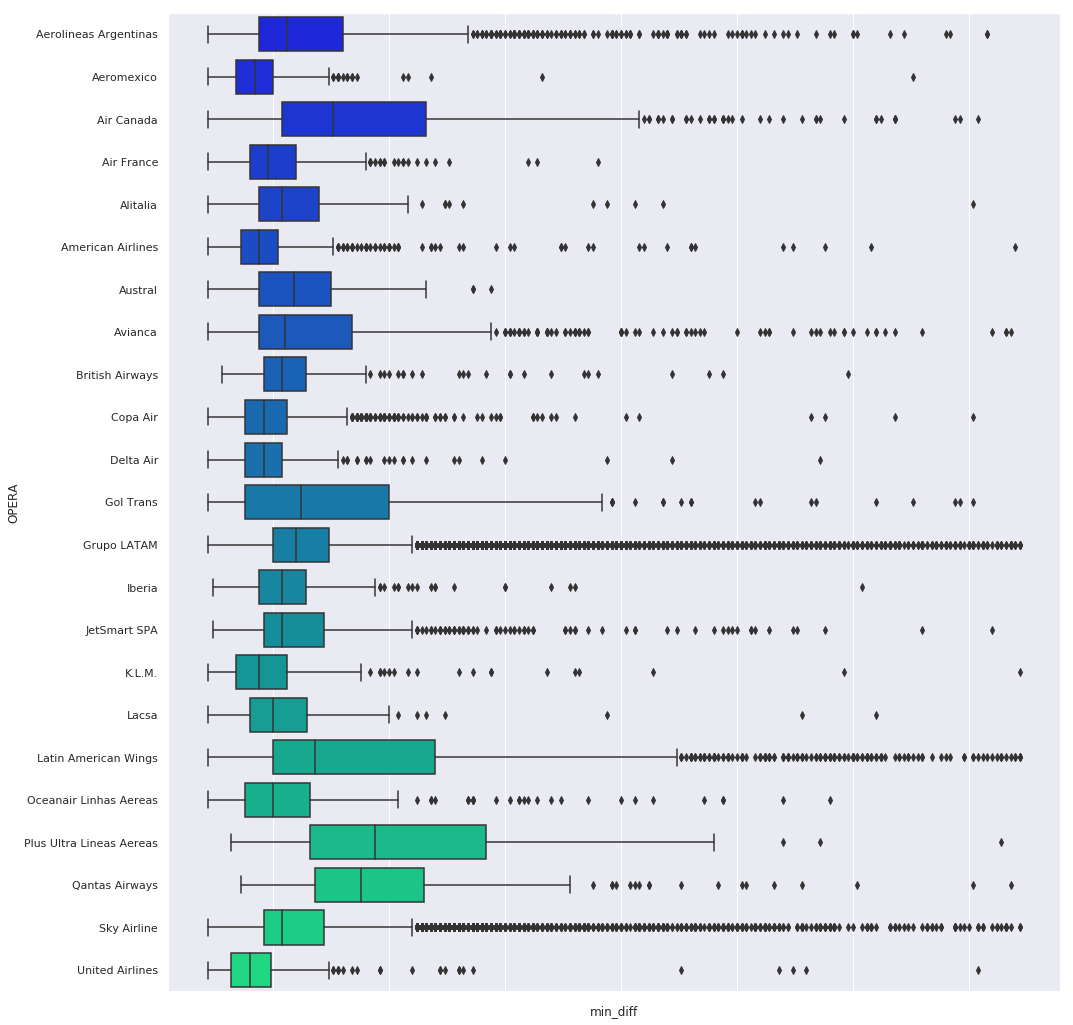

In [33]:
_ = plt.figure(figsize=(16,18))
_ = sns.boxplot(x='min_diff', y='OPERA', data=df, palette='winter')
_ = _.set_xticklabels(_.get_xticklabels(), rotation=90)

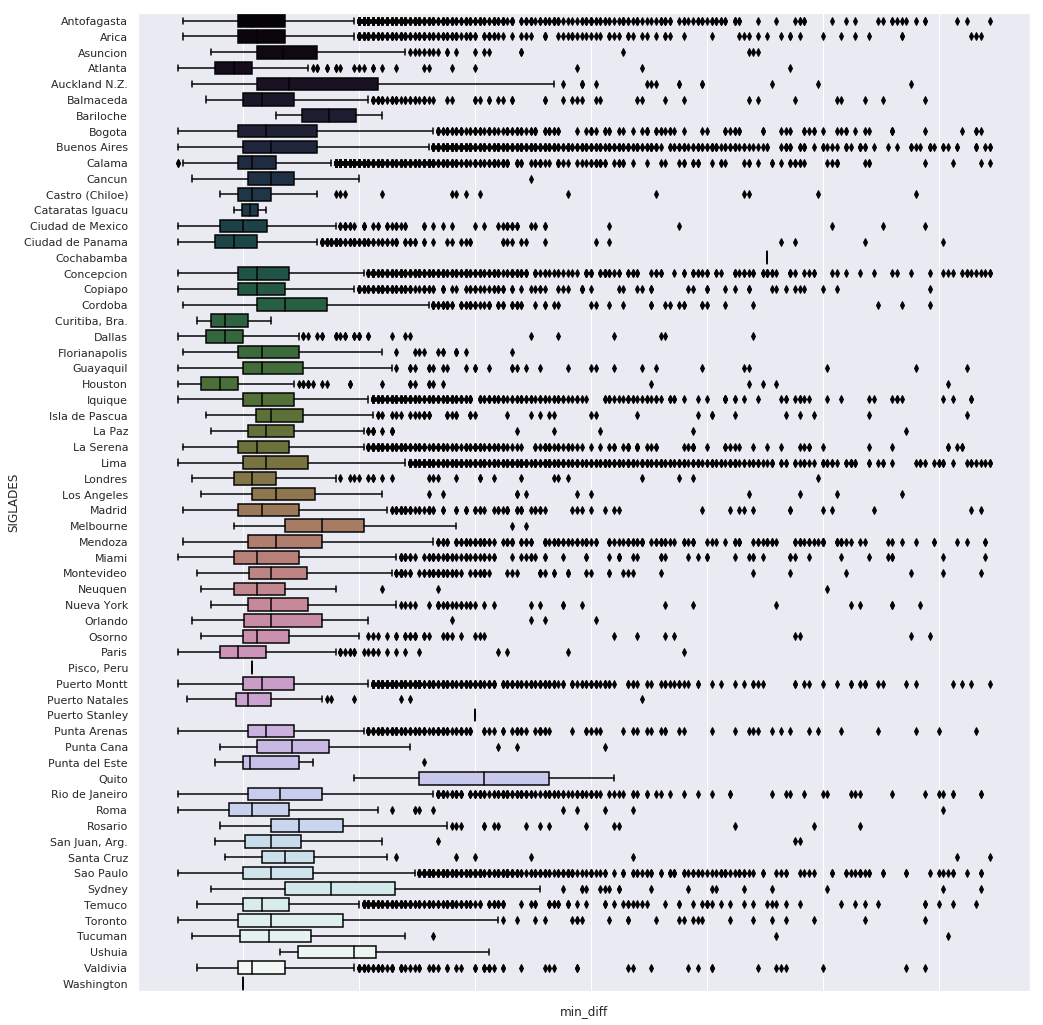

In [34]:
_ = plt.figure(figsize=(16,18))
_ = sns.boxplot(x='min_diff', y='SIGLADES', data=df, palette='cubehelix')
_ = _.set_xticklabels(_.get_xticklabels(), rotation=90)


In [37]:
df['high_season'] = 0
df.loc['07-15-2017':'07-31-2017', 'high_season'] = 1
df.loc['09-11-2017':'09-30-2017', 'high_season'] = 1
df.loc[:'03-03-2017', 'high_season'] = 1
df.loc['12-15-2017':, 'high_season'] = 1

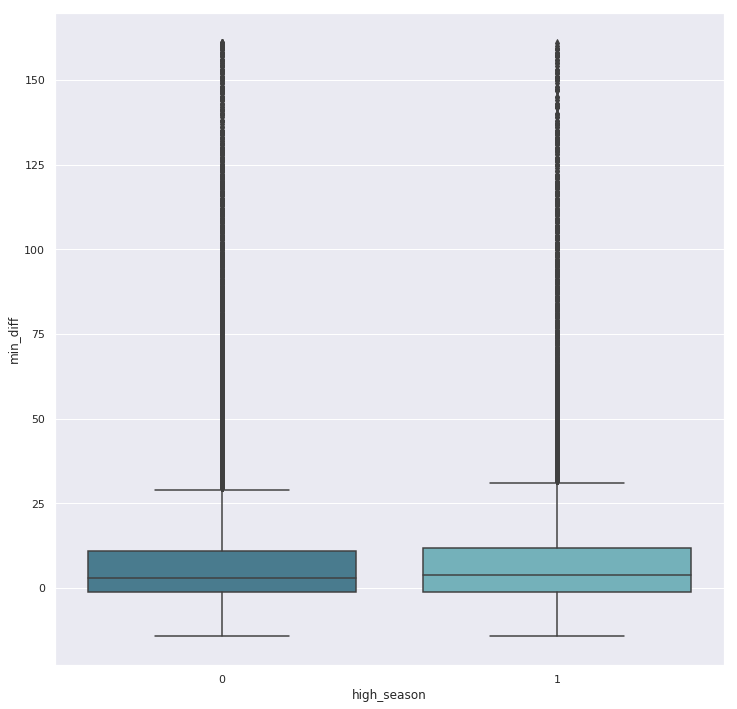

In [41]:
_ = plt.figure(figsize=(12,12))
_ = sns.boxplot(x='high_season', y='min_diff', data=df, palette='GnBu_d')
_ = _.set_xticklabels(_.get_xticklabels())

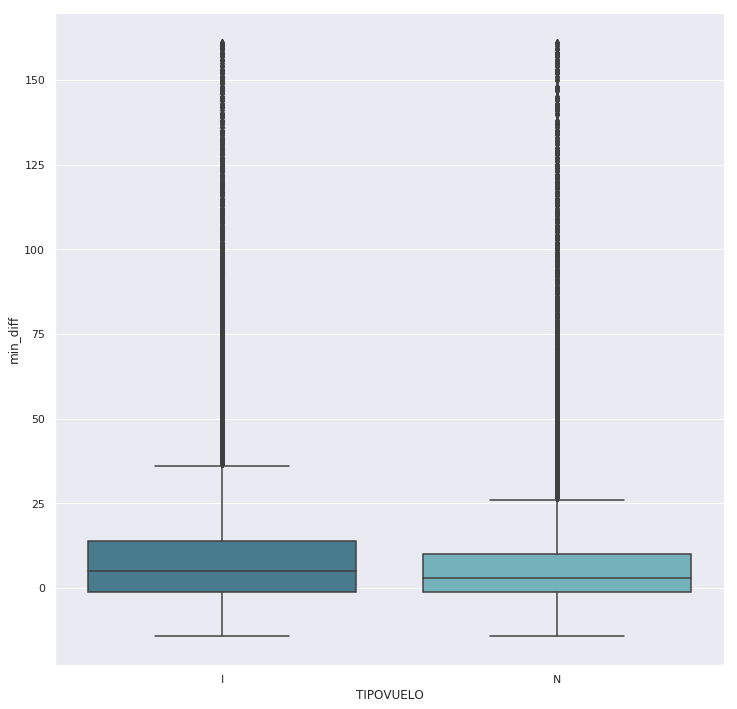

In [42]:
_ = plt.figure(figsize=(12,12))
_ = sns.boxplot(x='TIPOVUELO', y='min_diff', data=df, palette='GnBu_d')
_ = _.set_xticklabels(_.get_xticklabels())

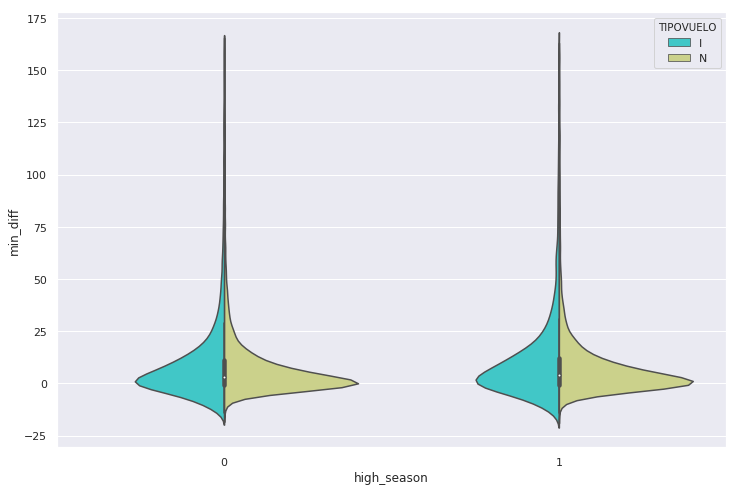

In [48]:
_ = plt.figure(figsize=(12,8))
_ = sns.violinplot(x='high_season', y='min_diff', data=df, split=True, hue='TIPOVUELO',palette='rainbow')

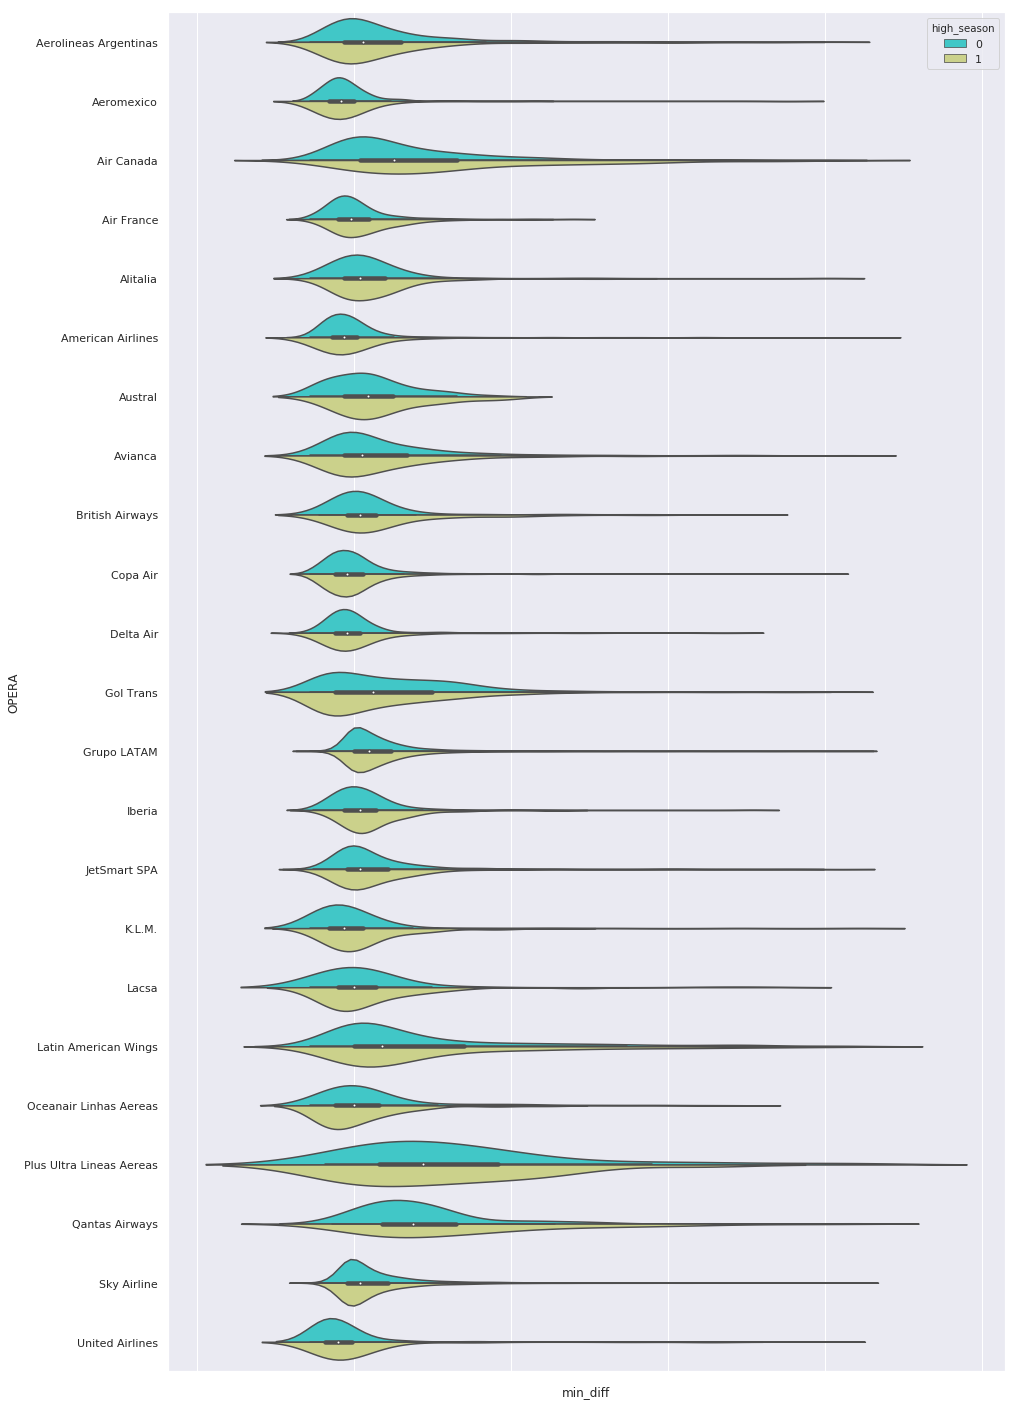

In [53]:
_ = plt.figure(figsize=(15,25))
_ = sns.violinplot(x='min_diff', y='OPERA', data=df, split=True, hue='high_season',palette='rainbow')
_ = _.set_xticklabels(_.get_xticklabels(), rotation=90)